In [1]:
# 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод.

import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

3.0


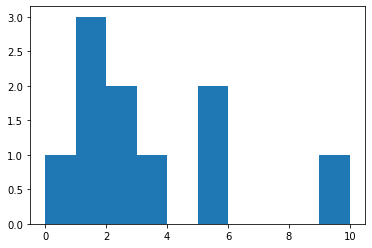

In [4]:
print(np.mean(X[:, 1]))
plt.hist(X[:, 1])
plt.show()

975.0


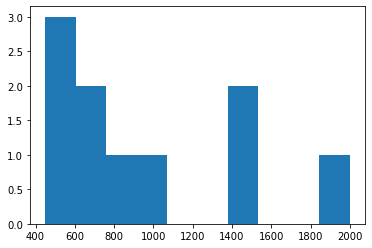

In [5]:
print(np.mean(X[:, 2]))
plt.hist(X[:, 2])
plt.show()

In [6]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [7]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

4.4408920985006264e-17
1.0


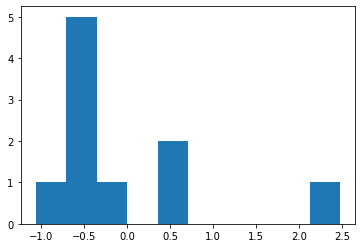

In [8]:
print(np.mean(X_st[:, 1]))
print(np.std(X_st[:, 1]))

plt.hist(X_st[:, 1])
plt.show()

-4.163336342344337e-17
0.9999999999999999


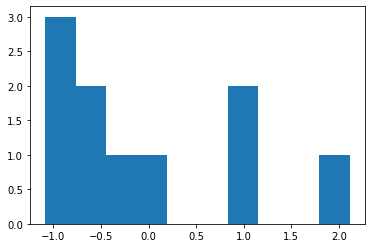

In [9]:
print(np.mean(X_st[:, 2]))
print(np.std(X_st[:, 2]))

plt.hist(X_st[:, 2])
plt.show()

In [10]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [11]:
W = np.random.randn(X.shape[1])
W

array([0.67542809, 0.45926493, 1.30082492, 0.52762431])

In [12]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [13]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=1e-10)

Iter: 0, weights: [10.17486567  1.48423277  1.24739016  2.24292174], error 3584.743387825149
Iter: 500, weights: [56.5         6.30306887 -0.35626999  6.57137832], error 24.90461887949931
Iter: 1000, weights: [56.5         6.30309349 -0.35638884  6.57147642], error 24.904618876908394
Iter: 1500, weights: [56.5         6.30309349 -0.35638885  6.57147642], error 24.904618876908373
Iter: 2000, weights: [56.5         6.30309349 -0.35638885  6.57147642], error 24.904618876908394
Iter: 2500, weights: [56.5         6.30309349 -0.35638885  6.57147642], error 24.904618876908394
Iter: 3000, weights: [56.5         6.30309349 -0.35638885  6.57147642], error 24.904618876908394
Iter: 3500, weights: [56.5         6.30309349 -0.35638885  6.57147642], error 24.904618876908394
Iter: 4000, weights: [56.5         6.30309349 -0.35638885  6.57147642], error 24.904618876908394
Iter: 4500, weights: [56.5         6.30309349 -0.35638885  6.57147642], error 24.904618876908394
Final MSE: 24.904618876908394


array([56.5       ,  6.30309349, -0.35638885,  6.57147642])

In [14]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=1e-1)

Iter: 0, weights: [11.40020912  2.27276944  2.03038326  2.29662099], error 3329.661011052283
Iter: 500, weights: [53.80952381  5.73058913  0.98368297  5.51609949], error 32.53248847473152
Iter: 1000, weights: [53.80952381  5.73058923  0.98368247  5.51609991], error 32.532488227897666
Iter: 1500, weights: [53.80952381  5.73058923  0.98368247  5.51609991], error 32.532488227897616
Iter: 2000, weights: [53.80952381  5.73058923  0.98368247  5.51609991], error 32.532488227897616
Iter: 2500, weights: [53.80952381  5.73058923  0.98368247  5.51609991], error 32.532488227897616
Iter: 3000, weights: [53.80952381  5.73058923  0.98368247  5.51609991], error 32.532488227897616
Iter: 3500, weights: [53.80952381  5.73058923  0.98368247  5.51609991], error 32.532488227897616
Iter: 4000, weights: [53.80952381  5.73058923  0.98368247  5.51609991], error 32.532488227897616
Iter: 4500, weights: [53.80952381  5.73058923  0.98368247  5.51609991], error 32.532488227897616
Final MSE: 32.532488227897616


array([53.80952381,  5.73058923,  0.98368247,  5.51609991])

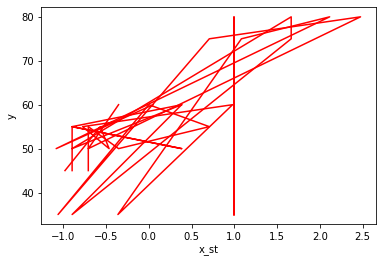

In [15]:
plt.xlabel('x_st')
plt.ylabel('y')

plt.plot(X_st, y, color='r')

In [83]:
print('Вывод: чем ниже reg, тем меньше ошибка MSE (с reg=1e-10 MSE=24.905, с reg=1e-1 MSE=32.532).')

Вывод: чем ниже reg, тем меньше ошибка MSE (с reg=1e-10 MSE=24.905, с reg=1e-1 MSE=32.532).


In [17]:
# 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

from math import fabs

def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-1):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        Reg_ = reg / fabs(reg) # производная по регуляризатору
        
        W -= eta * (dQ + Reg_)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [18]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1)

Iter: 0, weights: [10.77630819  1.43088858  1.82665589  2.69282984], error 3419.3132316352408
Iter: 500, weights: [56.          6.03822476 -0.44262339  6.34015646], error 25.445832530412304
Iter: 1000, weights: [56.          6.03824962 -0.44274338  6.3402555 ], error 25.445828542639287
Iter: 1500, weights: [56.          6.03824962 -0.44274339  6.3402555 ], error 25.445828542507037
Iter: 2000, weights: [56.          6.03824962 -0.44274339  6.3402555 ], error 25.445828542507037
Iter: 2500, weights: [56.          6.03824962 -0.44274339  6.3402555 ], error 25.445828542507037
Iter: 3000, weights: [56.          6.03824962 -0.44274339  6.3402555 ], error 25.445828542507037
Iter: 3500, weights: [56.          6.03824962 -0.44274339  6.3402555 ], error 25.445828542507037
Iter: 4000, weights: [56.          6.03824962 -0.44274339  6.3402555 ], error 25.445828542507037
Iter: 4500, weights: [56.          6.03824962 -0.44274339  6.3402555 ], error 25.445828542507037
Final MSE: 25.445828542507037


array([56.        ,  6.03824962, -0.44274339,  6.3402555 ])

In [86]:
# 3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
print('Ответ: нет, потому что одно взаимозаменяет другое. Можно решить задачу двумя способами - с нормализацией и стандартизацией - выбрать тот, который подходит больше.')

Ответ: нет, потому что одно взаимозаменяет другое. Можно решить задачу двумя способами - с нормализацией и стандартизацией - выбрать тот, который подходит больше.


In [48]:
# 4. *Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и 
# стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы 
# о разнице скорости сходимости каждого из методов.

from sklearn import datasets
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [49]:
# SGD

X, Y, coef = datasets.make_regression(n_samples=10000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)

X[:, 0] *= 100
display(X, Y, coef)

array([[-2.75161769e+01,  3.88051923e-01],
       [-7.39931870e+01,  6.41540019e-01],
       [ 1.73259956e+02,  1.38746003e+00],
       ...,
       [ 9.95690738e+00,  1.14050425e+00],
       [ 5.72821025e+01, -1.62061166e-03],
       [-8.10975181e+01, -7.90286210e-01]])

array([-14.05893282, -38.97475249,  86.53592019, ...,  10.32003217,
        29.28329989, -35.99295458])

array([47.46102593,  1.66486956])

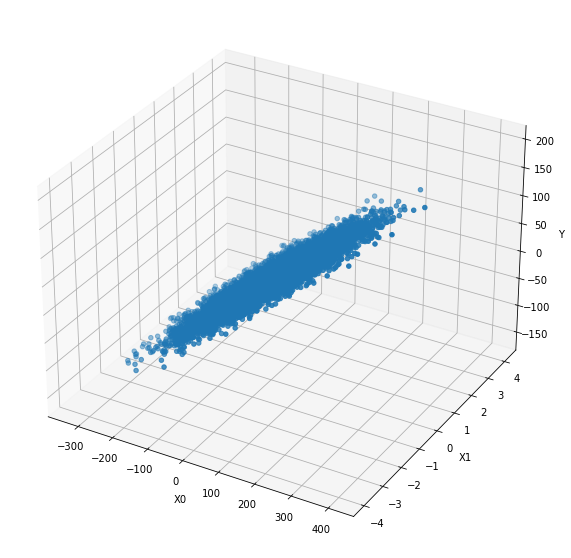

In [50]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [51]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
display(means, stds)

array([ 0.12550829, -0.002508  ])

array([99.51845776,  1.01311336])

In [52]:
X.shape[0]

10000

In [53]:
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [54]:
X

array([[-2.77754356e-01,  3.85504659e-01],
       [-7.44773351e-01,  6.35711699e-01],
       [ 1.73972197e+00,  1.37197680e+00],
       ...,
       [ 9.87897050e-02,  1.12821753e+00],
       [ 5.74331592e-01,  8.75901031e-04],
       [-8.16160421e-01, -7.77581502e-01]])

In [55]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)

array([-2.86881630e-17,  1.18793864e-18])

array([1., 1.])

In [56]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [57]:
%%time
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_SGD = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

Wall time: 0 ns


In [58]:
%%time
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error_SGD = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors_SGD.append(error_SGD)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error_SGD, 2)}')

    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error - {error_SGD}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors_SGD[-1], 4)}')

Iteration #0: W_new = [ 0.00034948 -0.01690677], MSE = 2262.83
Iteration #100: W_new = [40.04920451  1.49587177], MSE = 77.12
Iteration #200: W_new = [46.58451677  1.64014868], MSE = 25.62
Iteration #300: W_new = [47.10016491  2.8329605 ], MSE = 26.58
Iteration #400: W_new = [46.95881851  1.79704557], MSE = 25.28
Iteration #500: W_new = [47.71878721  1.90424404], MSE = 25.46
Iteration #600: W_new = [47.52985474  1.4550596 ], MSE = 25.29
Iteration #700: W_new = [47.69110777  1.16504079], MSE = 25.6
Iteration #800: W_new = [47.46864501  1.53686224], MSE = 25.23
Iteration #900: W_new = [47.46962352  2.29067017], MSE = 25.63
Iter 1000: error - 25.423511106923005, weights: [47.75156081  1.65409128]
В случае использования стохастического градиентного спуска ошибка составляет 25.4235
Wall time: 5.05 s


In [59]:
# GD

X, Y, coef = datasets.make_regression(n_samples=10000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)

X[:, 0] *= 100
display(X, Y, coef)

array([[-2.75161769e+01,  3.88051923e-01],
       [-7.39931870e+01,  6.41540019e-01],
       [ 1.73259956e+02,  1.38746003e+00],
       ...,
       [ 9.95690738e+00,  1.14050425e+00],
       [ 5.72821025e+01, -1.62061166e-03],
       [-8.10975181e+01, -7.90286210e-01]])

array([-14.05893282, -38.97475249,  86.53592019, ...,  10.32003217,
        29.28329989, -35.99295458])

array([47.46102593,  1.66486956])

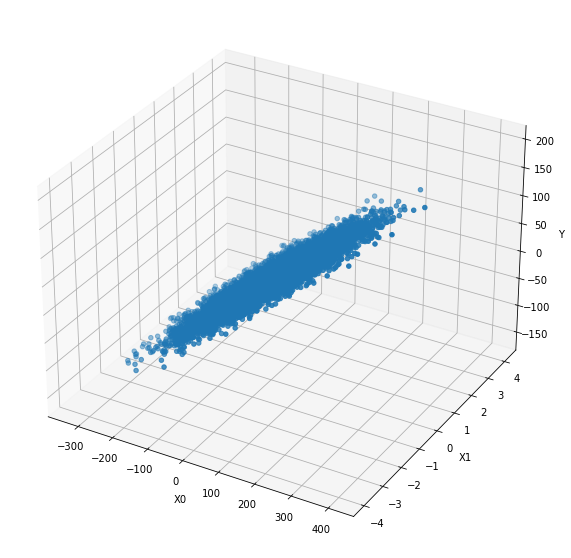

In [60]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [61]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
display(means, stds)

array([ 0.12550829, -0.002508  ])

array([99.51845776,  1.01311336])

In [62]:
X.shape[0]

10000

In [63]:
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]
X

array([[-2.77754356e-01,  3.85504659e-01],
       [-7.44773351e-01,  6.35711699e-01],
       [ 1.73972197e+00,  1.37197680e+00],
       ...,
       [ 9.87897050e-02,  1.12821753e+00],
       [ 5.74331592e-01,  8.75901031e-04],
       [-8.16160421e-01, -7.77581502e-01]])

In [64]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)

array([-2.86881630e-17,  1.18793864e-18])

array([1., 1.])

In [65]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [66]:
%%time
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_GD = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

Wall time: 0 ns


In [67]:
%%time
while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, w)
    dQ = 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)
    new_w = w - eta * dQ
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error_GD = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors_GD.append(error_GD)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error_GD, 2)}')
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
w_pred = w_list[-1]

print(f'Iter {iter_num}: error - {error_GD}, weights: {new_w}')
print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_GD[-1], 4)}')

Iteration #0: W_new = [0.94548842 0.04543349], MSE = 2174.08
Iteration #100: W_new = [41.11509653  1.60513513], MSE = 62.86
Iteration #200: W_new = [46.43873346  1.6701862 ], MSE = 25.84
Iteration #300: W_new = [47.14476989  1.66001459], MSE = 25.19
Iteration #400: W_new = [47.23847292  1.65617163], MSE = 25.17
Iteration #500: W_new = [47.2509177   1.65533087], MSE = 25.17
Iteration #600: W_new = [47.25257167  1.65517537], MSE = 25.17
Iteration #700: W_new = [47.25279165  1.6551489 ], MSE = 25.17
Iteration #800: W_new = [47.25282093  1.65514461], MSE = 25.17
Iteration #900: W_new = [47.25282483  1.65514394], MSE = 25.17
Iter 912: error - 25.174786710611, weights: [47.25282494  1.65514392]
В случае использования градиентного спуска функционал ошибки составляет 25.1748
Wall time: 5.01 s


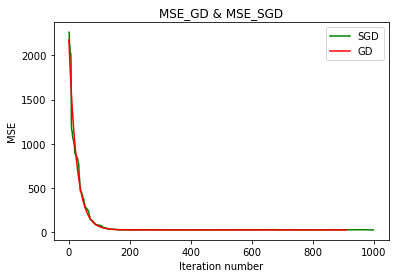

In [80]:
# Визуализируем изменение функционала ошибки

plt.title('MSE_GD & MSE_SGD')

plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')
plt.plot(range(len(errors_GD)), errors_GD, color='r', label='GD')
plt.legend()

In [87]:
print('Вывод: скорости (SGD = 5.05 s, GD = 5.01 s) практически не отличаются, GD быстрее на сотые доли.')

Вывод: скорости (SGD = 5.05 s, GD = 5.01 s) практически не отличаются, GD быстрее на сотые доли.
